## Desafio_1

Agora vamos praticas tudo o que aprendemos no módulo 1 utilizando dados reais do CAGED (Cadastro Geral de Empregados e Desempregados)

<br>
<img src="img/caged.png" width='1200' >
<br>

O Cadastro Geral de Empregados e Desempregados (CAGED) foi criado como registro permanente de admissões e dispensa de empregados, sob o regime da Consolidação das Leis do Trabalho (CLT).

É utilizado pelo Programa de Seguro-Desemprego, para conferir os dados referentes aos vínculos trabalhistas, além de outros programas sociais.

Este Cadastro serve, ainda, como base para a elaboração de estudos, pesquisas, projetos e programas ligados ao mercado de trabalho, ao mesmo tempo em que subsidia a tomada de decisões para ações governamentais.

Visite o sitee do CAGED através [deste link](http://trabalho.gov.br/trabalhador-caged/2015-09-10-17-46-22) e acesse os dados clicando inicialemente em **ESTATÍSTICA** e depois em **MICRODADOS**, então acesse a base de dados do CAGED e baixe o último arquivo do ano de 2018 **CAGEDEST_122018.7z**. Além disso, baize também o arquivo **CAGEDEST_layout_Atualizado.xls** para o dicionário de dados.

Após isso, podemos começar as nossas análises:

1. **Importar as bibliotecas** e ler os dados: Importe as bibliotecas necessárias e verifique a cara dos dados e suas informações básicas dos conteúdos das colunas.

2. Limpeza e transformação da variável alvo **Salário Mensal**: verifique o tipo de dado da variával Salário Mensal, faça as devidas mudanças, plote a distribuição e dispersão dos dados e aplique a transformação matemática para a correção da assimetria.

3. Verificação dos dados da variável **Idade**: verifique os dados da variável Idade, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

4. Verificação dos dados da variável **Grau de Instrução**: verifique os dados da variável Grau de instrução, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados.

5. Verificação dos dados da variável **Sexo**: verifique os dados da variável Sexo, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os homens ganham mais que as mulheres.

6. Verificação dos dados da variável **Raça Cor**: verifique os dados da variável Raça Cor, plote uma distribuição e uma dispersão, calcule a correlação com a variável salário mensal e interprete os resultados. Depois disso, faça uma inferência estatística pra verificar se os brancos ganham mais que os outros grupos étnicos.

7. Elaborar uma hipótese para ser rejeitada ou não-rejeitada por voce de acordo com o resultado da sua análise

8. Avançado: plote um SEABORN heatmap com **todas as correlações das variávies numéricas entre si**. 

9. Avançado: Plote uma **regressão múltipla**


In [5]:
import struct;print( 8 * struct.calcsize("P")) #Eu explorei este código para verificar se eu instalei corretamente o anaconda de 64bits.

64


In [6]:
import os
print(os.getcwd()) # Este código eu achei na internet devido a minha dificuldade de puxar o arquivo (que não resolveu, apenas ficou como curiosidade)

/home/joao/Digital_House/Módulo 1 - Análise Exploratória Básica/08 Desafio


In [7]:
import os

print(os.getcwd())

print(os.listdir(os.getcwd())) # Mesmo caso do anterior.

/home/joao/Digital_House/Módulo 1 - Análise Exploratória Básica/08 Desafio
['.~lock.CAGEDEST_layout_Atualizado.xls#', 'CAGEDEST_122018.txt', '.~lock.desafio 01.docx#', 'CAGEDEST_122018.7z', 'Desafio_Joao_marcelo.ipynb', '.ipynb_checkpoints', 'desafio 01.docx', 'img', 'CAGEDEST_layout_Atualizado.xls']


1. Importação dos dados

In [8]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") # A partir daqui foi feito as importações que eram necessárias e que achei interessante colocar.

In [9]:
%%time

df = pd.read_csv(r'CAGEDEST_122018.txt', sep=';', encoding = "ISO-8859-1", decimal = ',') # Com muita dificuldade, esta estapa foi vencida com um bizu e também com muita pesquisa. Eu não conhecia o formato 7z, eu pensei que no linux não era possível extrair o arquivo.

CPU times: user 6.27 s, sys: 700 ms, total: 6.97 s
Wall time: 7.11 s


2.Formatação e Limpeza e transformação da variável

In [10]:
df.shape

(2256752, 42)

In [11]:
df.info() #Esta etapa consegui verificar as informações contidas no arquivo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 42 columns):
Admitidos/Desligados     int64
Competência Declarada    int64
Município                int64
Ano Declarado            int64
CBO 2002 Ocupação        int64
CNAE 1.0 Classe          int64
CNAE 2.0 Classe          int64
CNAE 2.0 Subclas         int64
Faixa Empr Início Jan    int64
Grau Instrução           int64
Qtd Hora Contrat         int64
IBGE Subsetor            int64
Idade                    int64
Ind Aprendiz             int64
Ind Portador Defic       int64
Raça Cor                 int64
Salário Mensal           float64
Saldo Mov                int64
Sexo                     int64
Tempo Emprego            float64
Tipo Estab               int64
Tipo Defic               int64
Tipo Mov Desagregado     int64
UF                       int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm

In [12]:
df.describe()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Tempo Emprego,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Regiões Adm DF,Mesorregião,Microrregião,Ind Trab Parcial,Ind Trab Intermitente
count,2.256752e+06,2256752.0,2.256752e+06,2256752.0,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,...,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06,2.256752e+06
mean,1.574103e+00,201812.0,3.553863e+05,2018.0,5.368213e+05,5.304958e+04,5.126839e+04,5.126847e+06,4.303066e+00,6.595547e+00,...,1.318030e+01,1.084850e+00,1.553693e-02,6.216255e+00,3.534381e+01,7.773592e-01,3.540988e+03,3.537022e+04,4.852106e-03,5.339089e-03
std,4.944784e-01,0.0,8.300073e+04,0.0,1.784826e+05,2.269392e+04,2.468035e+04,2.468034e+06,2.646710e+00,1.548538e+00,...,3.413455e+01,4.031142e-01,2.154446e-01,9.922202e+00,8.311311e+00,8.125151e+01,8.309257e+02,8.310356e+03,6.948788e-02,7.287376e-02
min,1.000000e+00,201812.0,1.100010e+05,2018.0,3.011000e+04,1.112000e+03,1.113000e+03,1.113010e+05,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,0.000000e+00,1.101000e+03,1.100100e+04,0.000000e+00,0.000000e+00
25%,1.000000e+00,201812.0,3.147000e+05,2018.0,4.141050e+05,4.525000e+04,4.213800e+04,4.213800e+06,2.000000e+00,6.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,3.100000e+01,0.000000e+00,3.108000e+03,3.103900e+04,0.000000e+00,0.000000e+00
50%,2.000000e+00,201812.0,3.531500e+05,2018.0,5.174100e+05,5.241800e+04,4.773300e+04,4.773300e+06,4.000000e+00,7.000000e+00,...,2.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,3.500000e+01,0.000000e+00,3.512000e+03,3.504600e+04,0.000000e+00,0.000000e+00
75%,2.000000e+00,201812.0,4.117900e+05,2018.0,7.152100e+05,7.412800e+04,7.490100e+04,7.490102e+06,6.000000e+00,7.000000e+00,...,1.100000e+01,1.000000e+00,0.000000e+00,6.000000e+00,4.100000e+01,0.000000e+00,4.110000e+03,4.103700e+04,0.000000e+00,0.000000e+00
max,2.000000e+00,201812.0,5.300100e+05,2018.0,9.922250e+05,9.900700e+04,9.900800e+04,9.900800e+06,9.000000e+00,9.000000e+00,...,5.990000e+02,3.000000e+00,6.000000e+00,9.000000e+01,5.300000e+01,9.999000e+03,5.301000e+03,5.300100e+04,1.000000e+00,1.000000e+00


In [13]:
df.corr().round(2)

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Tempo Emprego,Tipo Estab,Tipo Defic,Tipo Mov Desagregado,UF,Regiões Adm DF,Mesorregião,Microrregião,Ind Trab Parcial,Ind Trab Intermitente
Admitidos/Desligados,1.00,NaN,0.01,NaN,0.01,-0.05,-0.05,-0.05,0.06,-0.03,...,0.33,0.04,-0.00,0.25,0.01,0.00,0.01,0.01,0.00,-0.05
Competência Declarada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Município,0.01,NaN,1.00,NaN,0.01,-0.03,-0.02,-0.02,-0.01,-0.01,...,-0.01,0.01,-0.00,-0.02,1.00,0.02,1.00,1.00,-0.03,-0.01
Ano Declarado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CBO 2002 Ocupação,0.01,NaN,0.01,NaN,1.00,-0.43,-0.44,-0.44,-0.03,-0.43,...,-0.08,0.10,-0.00,-0.00,0.01,-0.00,0.01,0.01,-0.04,0.01
CNAE 1.0 Classe,-0.05,NaN,-0.03,NaN,-0.43,1.00,0.96,0.96,0.05,0.34,...,0.03,-0.35,0.00,-0.03,-0.03,0.00,-0.03,-0.03,0.04,0.00
CNAE 2.0 Classe,-0.05,NaN,-0.02,NaN,-0.44,0.96,1.00,1.00,0.07,0.33,...,0.03,-0.32,-0.00,-0.02,-0.03,0.00,-0.02,-0.02,0.04,0.00
CNAE 2.0 Subclas,-0.05,NaN,-0.02,NaN,-0.44,0.96,1.00,1.00,0.07,0.33,...,0.03,-0.32,-0.00,-0.02,-0.03,0.00,-0.02,-0.02,0.04,0.00
Faixa Empr Início Jan,0.06,NaN,-0.01,NaN,-0.03,0.05,0.07,0.07,1.00,-0.01,...,0.10,-0.14,0.04,0.06,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00
Grau Instrução,-0.03,NaN,-0.01,NaN,-0.43,0.34,0.33,0.33,-0.01,1.00,...,0.04,-0.21,-0.01,-0.01,-0.01,0.00,-0.01,-0.01,0.03,0.00


In [14]:
df.index

RangeIndex(start=0, stop=2256752, step=1)

In [15]:
df.columns

Index(['Admitidos/Desligados', 'Competência Declarada', 'Município',
       'Ano Declarado', 'CBO 2002 Ocupação', 'CNAE 1.0 Classe',
       'CNAE 2.0 Classe', 'CNAE 2.0 Subclas', 'Faixa Empr Início Jan',
       'Grau Instrução', 'Qtd Hora Contrat', 'IBGE Subsetor', 'Idade',
       'Ind Aprendiz', 'Ind Portador Defic', 'Raça Cor', 'Salário Mensal',
       'Saldo Mov', 'Sexo', 'Tempo Emprego', 'Tipo Estab', 'Tipo Defic',
       'Tipo Mov Desagregado', 'UF', 'Bairros SP', 'Bairros Fortaleza',
       'Bairros RJ', 'Distritos SP', 'Regiões Adm DF', 'Mesorregião',
       'Microrregião', 'Região Adm RJ', 'Região Adm SP', 'Região Corede',
       'Região Corede 04', 'Região Gov SP', 'Região Senac PR',
       'Região Senai PR', 'Região Senai SP', 'Sub-Região Senai PR',
       'Ind Trab Parcial', 'Ind Trab Intermitente'],
      dtype='object')

In [16]:
df.count()

Admitidos/Desligados     2256752
Competência Declarada    2256752
Município                2256752
Ano Declarado            2256752
CBO 2002 Ocupação        2256752
CNAE 1.0 Classe          2256752
CNAE 2.0 Classe          2256752
CNAE 2.0 Subclas         2256752
Faixa Empr Início Jan    2256752
Grau Instrução           2256752
Qtd Hora Contrat         2256752
IBGE Subsetor            2256752
Idade                    2256752
Ind Aprendiz             2256752
Ind Portador Defic       2256752
Raça Cor                 2256752
Salário Mensal           2256752
Saldo Mov                2256752
Sexo                     2256752
Tempo Emprego            2256752
Tipo Estab               2256752
Tipo Defic               2256752
Tipo Mov Desagregado     2256752
UF                       2256752
Bairros SP               2256752
Bairros Fortaleza        2256752
Bairros RJ               2256752
Distritos SP             2256752
Regiões Adm DF           2256752
Mesorregião              2256752
Microrregi

In [17]:
df.isnull().sum()

Admitidos/Desligados     0
Competência Declarada    0
Município                0
Ano Declarado            0
CBO 2002 Ocupação        0
CNAE 1.0 Classe          0
CNAE 2.0 Classe          0
CNAE 2.0 Subclas         0
Faixa Empr Início Jan    0
Grau Instrução           0
Qtd Hora Contrat         0
IBGE Subsetor            0
Idade                    0
Ind Aprendiz             0
Ind Portador Defic       0
Raça Cor                 0
Salário Mensal           0
Saldo Mov                0
Sexo                     0
Tempo Emprego            0
Tipo Estab               0
Tipo Defic               0
Tipo Mov Desagregado     0
UF                       0
Bairros SP               0
Bairros Fortaleza        0
Bairros RJ               0
Distritos SP             0
Regiões Adm DF           0
Mesorregião              0
Microrregião             0
Região Adm RJ            0
Região Adm SP            0
Região Corede            0
Região Corede 04         0
Região Gov SP            0
Região Senac PR          0
R

In [18]:
df.head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
0,1,201812,500215,2018,711210,1619,1610,161003,1,6,...,999,{ñ,99,999,99,{ñ,999,99,0,0
1,1,201812,500710,2018,321210,2119,2101,210101,1,8,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
3,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1
4,1,201812,500460,2018,623110,1619,1610,161003,1,2,...,999,{ñ,99,999,99,{ñ,999,99,0,1


In [19]:
df.tail()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Adm SP,Região Corede,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente
2256747,2,201812,221100,2018,252405,91995,94308,9430800,5,9,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256748,2,201812,221100,2018,514120,91995,94308,9430800,6,7,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256749,2,201812,221100,2018,422110,85138,86305,8630503,1,7,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256750,2,201812,221100,2018,422315,66303,65502,6550200,6,8,...,999,{ñ,99,999,99,{ñ,999,99,0,0
2256751,2,201812,220770,2018,231105,80144,85121,8512100,5,9,...,999,{ñ,99,999,99,{ñ,999,99,0,0


In [20]:
pd.read_csv(r'CAGEDEST_122018.txt', sep=';', encoding = "ISO-8859-1", decimal = ',', usecols=('Grau Instrução', 'Idade', 'Raça Cor', 'Salário Mensal', 'Sexo'))

,Grau Instrução,Idade,Raça Cor,Salário Mensal,Sexo
0,6,24,8,954.0,1
1,8,25,2,2500.0,1
2,2,55,8,0.0,1
3,2,52,8,0.0,1
4,2,32,8,0.0,1
5,2,56,8,0.0,1
6,2,22,8,0.0,1
7,4,50,2,1061.0,2
8,2,27,1,0.0,2
9,2,34,1,0.0,2


In [21]:
df.rename(columns={'Salário Mensal': 'Salario'}, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256752 entries, 0 to 2256751
Data columns (total 42 columns):
Admitidos/Desligados     int64
Competência Declarada    int64
Município                int64
Ano Declarado            int64
CBO 2002 Ocupação        int64
CNAE 1.0 Classe          int64
CNAE 2.0 Classe          int64
CNAE 2.0 Subclas         int64
Faixa Empr Início Jan    int64
Grau Instrução           int64
Qtd Hora Contrat         int64
IBGE Subsetor            int64
Idade                    int64
Ind Aprendiz             int64
Ind Portador Defic       int64
Raça Cor                 int64
Salario                  float64
Saldo Mov                int64
Sexo                     int64
Tempo Emprego            float64
Tipo Estab               int64
Tipo Defic               int64
Tipo Mov Desagregado     int64
UF                       int64
Bairros SP               object
Bairros Fortaleza        object
Bairros RJ               object
Distritos SP             object
Regiões Adm

2.1 Salário Mensal

In [23]:
type("Salario")

str

In [24]:
df = df[df.Salario != 0]

In [25]:
df["Salario"].sum() #soma dos salários

3672286655.0

In [26]:
df["Salario"].mean() #média salarial

1644.9160764109586

In [27]:
df["Salario"].mode()

0    954.0
dtype: float64

In [28]:
df["Salario"].max()

142830.0

In [29]:
df["Salario"].min()

287.0

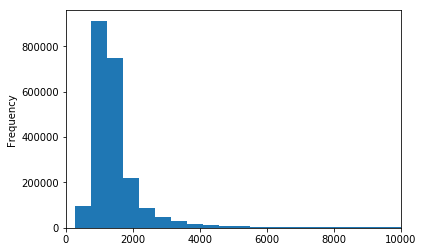

In [30]:
%matplotlib inline


df["Salario"].plot.hist(bins=300, xlim=(0, 10000))

Text(0.5,1,'Salário')

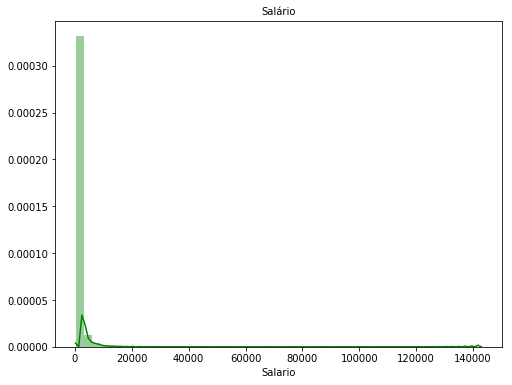

In [31]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.distplot(df.Salario, bins=50, color='Green')
plt.title('Salário', size=10)

In [32]:
df["Salario"] = df["Salario"][(df["Salario"]>0) & (df["Salario"]< 999999)]

In [33]:
df["Salario"].value_counts().head()

954.0     95704
1500.0    24390
1200.0    24382
1050.0    18745
1300.0    17894
Name: Salario, dtype: int64

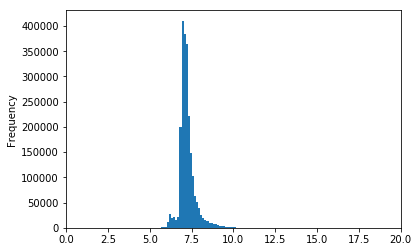

In [34]:
df['log_Salario'] = np.log1p(df['Salario']) #o 'p' evita erro
df['log_Salario'].plot.hist(bins=50, xlim=(0, 20))

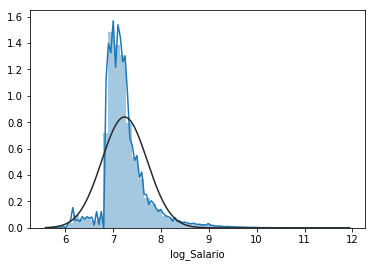

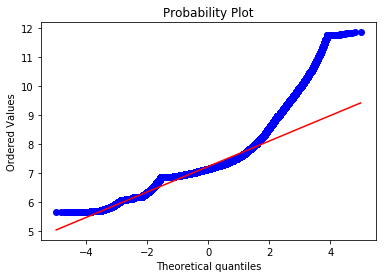

In [35]:
sns.distplot(df['log_Salario'], fit=stats.norm);
fig = plt.figure()
res = stats.probplot(df['log_Salario'], plot=plt)

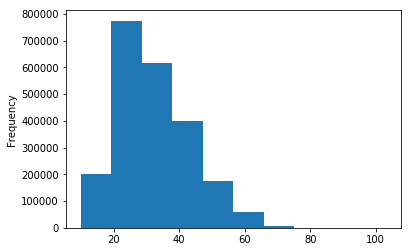

In [36]:
df.Idade.plot.hist()

In [37]:
df["Idade"].mean()

32.30333208361721

Text(0.5,1,'Salario vs Idade')

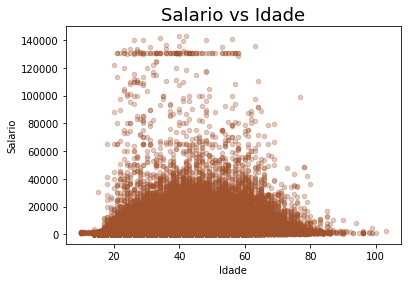

In [38]:
df.plot.scatter(x='Idade',y='Salario', alpha=0.3, c='sienna')
plt.title('Salario vs Idade', size=18)

In [39]:
df['log_Idade'] = np.log1p(df['Idade'])

Text(0.5,1,'Log Salário vs log Idade')

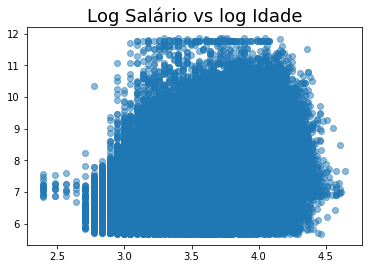

In [40]:
plt.scatter(y=df['log_Salario'],x=df['log_Idade'], alpha=0.5)
plt.title('Log Salário vs log Idade', size=18)

In [41]:
df[['Salario', 'Idade']].corr(method='kendall')

,Salario,Idade
Salario,1.000000,0.206515
Idade,0.206515,1.000000


In [42]:
df[['Salario', 'Idade']].corr(method='pearson')

,Salario,Idade
Salario,1.000000,0.153532
Idade,0.153532,1.000000


In [43]:
df[['Salario', 'Idade']].corr(method='spearman')

,Salario,Idade
Salario,1.000000,0.298342
Idade,0.298342,1.000000


Interpretação do resultado: A grande parte da população ganha 1 salário mínimo e abaixo da média R$ 1.644,00

4.Grau de Instrução

In [44]:
df['Grau Instrução'].value_counts().head()

7    1262753
9     247027
6     199335
5     197956
4     122405
Name: Grau Instrução, dtype: int64

In [45]:
df['Grau Instrução'].value_counts()


7    1262753
9     247027
6     199335
5     197956
4     122405
8      88328
2      59969
3      46667
1       8067
Name: Grau Instrução, dtype: int64

In [46]:
df['Grau Instrução'].value_counts(3)

7    0.565621
9    0.110650
6    0.089288
5    0.088670
4    0.054828
8    0.039564
2    0.026862
3    0.020903
1    0.003613
Name: Grau Instrução, dtype: float64

Text(0.5,1,'Frequência de instrução')

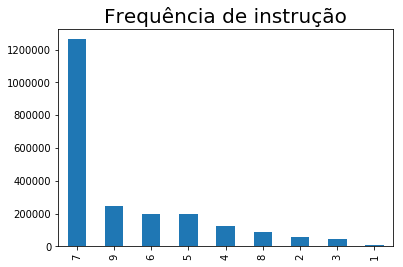

In [47]:
df['Grau Instrução'].value_counts().plot(kind='bar')
plt.title('Frequência de instrução', size=20)

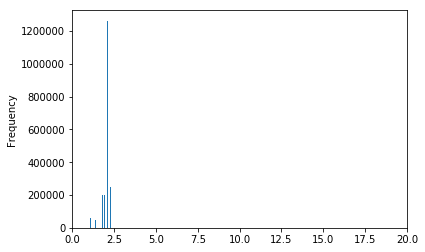

In [98]:
df['log_GrauInstrução'] = np.log1p(df['Grau Instrução']) #o 'p' evita erro
df['log_GrauInstrução'].plot.hist(bins=50, xlim=(0, 20))

In [48]:
df2 = df[['Grau Instrução', 'Salario']]

In [49]:
df2[0:10]

,Grau Instrução,Salario
0,6,954.0
1,8,2500.0
7,4,1061.0
11,7,1061.0
12,7,1061.0
13,6,1061.0
14,2,1026.0
15,5,1061.0
16,5,1061.0
17,5,1700.0


In [50]:
df.sample(200000).head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente,log_Salario,log_Idade
455422,2,201812,430060,2018,421125,52124,47113,4711302,6,6,...,12,999,99,{ñ,999,99,0,0,7.170888,3.637586
1421932,1,201812,330330,2018,521110,52337,47822,4782201,4,7,...,99,999,99,{ñ,999,99,0,0,7.078342,3.583519
2158258,1,201812,130260,2018,314410,74500,78108,7810800,1,7,...,99,999,99,{ñ,999,99,0,0,8.311153,3.295837
1417276,1,201812,330455,2018,848110,52124,47113,4711302,6,6,...,99,999,99,{ñ,999,99,0,0,7.320527,3.891820
190465,1,201812,530010,2018,212420,72214,62031,6203100,4,7,...,99,999,99,{ñ,999,99,0,0,7.084226,3.218876


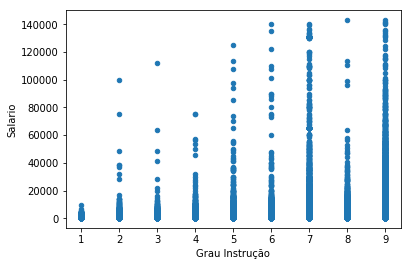

In [51]:
df.plot.scatter(x='Grau Instrução',y='Salario')

In [52]:
#from scipy.stats import bernoulli

In [53]:
#for n in [3,10,100,1000,10000,100000,1000000,10000000]:
#    bern = bernoulli.rvs(p=0.7, size=n,random_state=24) # rsv=Random Variates
 #   print('\namostra:',n)
#    print('média:', bern.sum()/len(bern))
 #   print('var:', bern.std()**2) 

In [54]:
#n = np.arange(0,100)
#y= bernoulli.rvs(p=0.7, size=100,random_state=24) # rsv=random variates
#y

In [55]:
#plt.plot(n,y,'o')
#plt.title('Bernoulli')
#plt.xlabel('Dispersion')
#plt.show()

In [56]:
#pd.describe_option()

In [57]:
df[['Grau Instrução', 'Salario']].corr(method='kendall')

,Grau Instrução,Salario
Grau Instrução,1.000000,0.173664
Salario,0.173664,1.000000


Comparando o gráfico, pude entender que mesmo representando 11% com o grau de instrução ensino superior (9), é a frente das pessoas que tem ensino médio, representando 56% da população.

5.Sexo

In [58]:
df['Sexo'].value_counts(dropna=False).nlargest(7) # 1: Masculino, 2: Feminino. Temos mais o público masculino que representa a grande maioria.

1    1310312
2     922195
Name: Sexo, dtype: int64

In [59]:
df['Sexo'].value_counts(3)

1    0.586924
2    0.413076
Name: Sexo, dtype: float64

In [60]:
print('A base tem '+str(round(len(df[df.Sexo == 1]) / len(df) * 100, 2))+'% de homens e '+str(round(len(df[df.Sexo == 2]) / len(df) * 100, 2))+'% de mulheres.')

A base tem 58.69% de homens e 41.31% de mulheres.


In [61]:
df['Sexo'].value_counts().head(1)

1    1310312
Name: Sexo, dtype: int64

In [62]:
df2 = df[['Sexo', 'Salario']]

In [63]:
df2[0:10]

,Sexo,Salario
0,1,954.0
1,1,2500.0
7,2,1061.0
11,1,1061.0
12,1,1061.0
13,1,1061.0
14,1,1026.0
15,1,1061.0
16,1,1061.0
17,1,1700.0


In [64]:
df.sample(200000).head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente,log_Salario,log_Idade
1788298,2,201812,310620,2018,517420,74500,78302,7830200,6,5,...,99,999,99,{ñ,999,99,0,0,7.239933,3.583519
1314077,2,201812,351620,2018,764105,19313,15319,1531901,4,6,...,99,042,99,{ñ,14,99,0,0,5.945421,2.772589
1193046,2,201812,355030,2018,521140,52124,47113,4711302,1,7,...,99,001,99,{ñ,46,99,0,0,7.242082,3.555348
720527,1,201812,351740,2018,521110,85324,88006,8800600,5,7,...,99,041,99,{ñ,14,99,0,0,6.861711,2.833213
1448000,1,201812,330430,2018,992225,74993,82113,8211300,9,7,...,99,999,99,{ñ,999,99,0,0,7.013016,3.044522


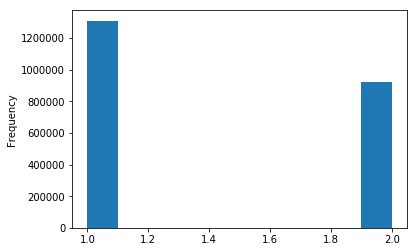

In [65]:
%matplotlib inline

df['Sexo'].plot(kind="hist")

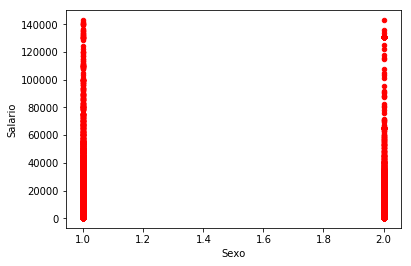

In [66]:
df.plot.scatter(x='Sexo',y='Salario', s=20, c='red')

In [67]:
df[['Sexo', 'Salario']].corr(method='kendall')

,Sexo,Salario
Sexo,1.000000,-0.109892
Salario,-0.109892,1.000000


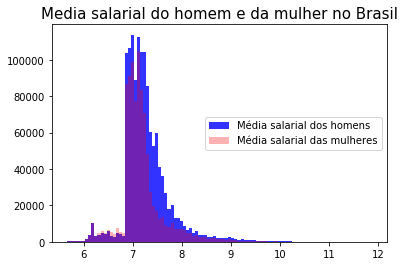

In [68]:
plt.hist(df[df.Sexo == 1].log_Salario, bins=100, alpha=0.8, label='Média salarial dos homens', color="Blue")
plt.hist(df[df.Sexo == 2].log_Salario, bins=100, alpha=0.3, label='Média salarial das mulheres', color="Red")
plt.legend(loc=7)
plt.title('Media salarial do homem e da mulher no Brasil', size=15)
plt.show()


Analisando o gráfico e os dados anteriores, existe uma leve diferença salarial entre homens e mulheres, sendo que os homens ganham em média um pouco mais que as mulheres.

In [69]:
df['Raça Cor'].value_counts().head(1)

2    969145
Name: Raça Cor, dtype: int64

In [70]:
df['Raça Cor'].value_counts()

2    969145
8    807917
9    302605
4    132459
6     10857
1      9524
Name: Raça Cor, dtype: int64

In [71]:
df['Raça Cor'].value_counts(3)

2    0.434106
8    0.361888
9    0.135545
4    0.059332
6    0.004863
1    0.004266
Name: Raça Cor, dtype: float64

In [72]:
df2 = df[['Raça Cor', 'Salario']]

In [73]:
df2[0:10]

,Raça Cor,Salario
0,8,954.0
1,2,2500.0
7,2,1061.0
11,8,1061.0
12,2,1061.0
13,2,1061.0
14,2,1026.0
15,8,1061.0
16,9,1061.0
17,8,1700.0


In [74]:
df.sample(200000).head()

,Admitidos/Desligados,Competência Declarada,Município,Ano Declarado,CBO 2002 Ocupação,CNAE 1.0 Classe,CNAE 2.0 Classe,CNAE 2.0 Subclas,Faixa Empr Início Jan,Grau Instrução,...,Região Corede 04,Região Gov SP,Região Senac PR,Região Senai PR,Região Senai SP,Sub-Região Senai PR,Ind Trab Parcial,Ind Trab Intermitente,log_Salario,log_Idade
209412,2,201812,530010,2018,231340,80209,85201,8520100,6,9,...,99,999,99,{ñ,999,99,0,0,8.145260,3.465736
1495217,2,201812,330455,2018,253120,70106,41107,4110700,4,9,...,99,999,99,{ñ,999,99,0,0,7.921173,3.367296
302119,2,201812,420730,2018,782510,60267,49302,4930201,1,7,...,99,999,99,{ñ,999,99,0,0,7.218177,3.465736
1293036,2,201812,354910,2018,784205,74500,78205,7820500,5,7,...,99,020,99,{ñ,30,99,0,0,7.194437,3.178054
519666,2,201812,431490,2018,141410,74500,78205,7820500,9,7,...,12,999,99,{ñ,999,99,0,0,6.844815,3.135494


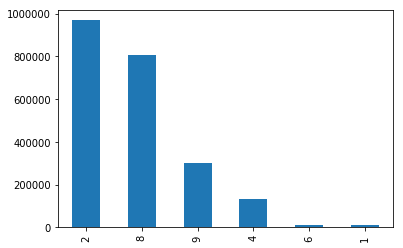

In [75]:
df['Raça Cor'].value_counts().plot(kind='bar')

In [79]:
#%matplotlib inline

#df['Raça Cor'].plot(kind="h")

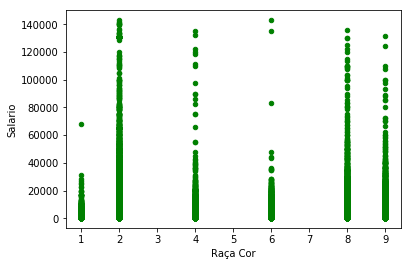

In [77]:
df.plot.scatter(x='Raça Cor',y='Salario', s=20, c='Green')

In [ ]:
#pd.get_option('display.max_columns')

In [78]:
df[['Raça Cor', 'Salario']].corr(method='kendall')

,Raça Cor,Salario
Raça Cor,1.000000,-0.103326
Salario,-0.103326,1.000000


Os brancos não ganham mais que os outros grupos no total.

In [90]:
Raça_cor = df.groupby('Raça Cor')['log_Salario'].mean().reset_index()
print(Raça_cor)

   Raça Cor  log_Salario
0         1     7.291293
1         2     7.308394
2         4     7.183079
3         6     7.350755
4         8     7.174312
5         9     7.203077


Hipótese: Os Brancos são a maioria com ensino médio?

In [92]:
df['Raça Cor'].dtypes

dtype('int64')

In [94]:
df['Raça Cor'] = df['Raça Cor'].astype(str)

In [95]:
df['Raça Cor'].replace({'1': 'Indígena',
                              '2': 'Branca',
                              '4': 'Preta',
                              '6': 'Amarela',
                              '8': 'Parda',
                              '9': 'Não identificada',
                              '-1': 'Ignorado'}, inplace=True)

In [96]:
df['Raça Cor'].value_counts()

Branca              969145
Parda               807917
Não identificada    302605
Preta               132459
Amarela              10857
Indígena              9524
Name: Raça Cor, dtype: int64

In [102]:
M_Branca = df[df['Raça Cor'] == 2].log_GrauInstrução.mean()
M_Parda = df[df['Raça Cor'] == 8].log_GrauInstrução.mean()
M_Preta = df[df['Raça Cor'] == 4].log_GrauInstrução.mean()
M_Amarela = df[df['Raça Cor'] == 6].log_GrauInstrução.mean()
M_Indígena = df[df['Raça Cor'] == 1].log_GrauInstrução.mean()

Branca = df[df['Raça Cor'] == 2].log_GrauInstrução.std()
Parda = df[df['Raça Cor'] == 8].log_GrauInstrução.std()
Preta = df[df['Raça Cor'] == 4].log_GrauInstrução.std()
Amarela = df[df['Raça Cor'] == 6].log_GrauInstrução.std()
Indígena = df[df['Raça Cor'] == 1].log_GrauInstrução.std()



M_Branca, M_Parda, M_Preta, M_Amarela, M_Indígena

(nan, nan, nan, nan, nan)

In [103]:
stats.norm.interval(0.95, loc=M_Branca, scale=Branca)[0] < M_Parda < stats.norm.interval(0.95, loc=M_Branca, scale=Branca)[1]

False

Os brancos não são a maioria.